# Air Quality in Istanbul between 2014.01 - 2020.07

 -*- coding: utf-8 -*-


Created on Thursday Aug  2 21:34:41 2020

@author: erolerdogan


**T	:**Average Temperature (°C)

**TM:**Maximum temperature (°C)

**Tm:**Minimum temperature (°C)

**SLP:**	Atmospheric pressure at sea level (hPa)

**H	:** Average relative humidity (%)

**PP:**Total rainfall and / or snowmelt (mm)

**VV:**Average visibility (Km)

**V	:**Average wind speed (Km/h)

**VM:**Maximum sustained wind speed (Km/h)

**VG:**Maximum speed of wind (Km/h)

**RA:**Indicate if there was rain or drizzle (In the monthly average, total days it rained)

**SN:**Snow indicator (In the monthly average, total days that snowed)

**TS:**Indicates whether there storm (In the monthly average, Total days with thunderstorm)

**FG:**Indicates whether there was fog (In the monthly average, Total days with fog)

### Data Sources

1. AQI (PM2.5, PM10 etc) => https://aqicn.org/data-platform/register/
2. The data between 2017-2020 from Turkey => https://sim.csb.gov.tr/
3. Details (T, TM, Tm etc.) => https://en.tutiempo.net/istanbul.html
4. http://www.havaizleme.gov.tr/


### Useful Links to understand project items better

1. PM2.5 vs PM10 => https://smartairfilters.com/en/blog/pm10-pm2-5-difference-particle-air-pollution/
2. Conversion from PM10 to PM2.5 => https://www.epd.gov.hk/epd/english/environmentinhk/air/guide_ref/guide_aqa_model_g5.html
3. Equation of calculating Air Quality Index => https://en.wikipedia.org/wiki/Air_quality_index
4. Information about PM2.5 https://www.iqair.com/us/blog/air-quality/pm2-5
5. Information about PM10 https://www.iqair.com/us/blog/air-quality/pm10

## Data Importing and Understanding

In [1]:
import pandas as pd
import numpy as np

#### Air Quality 2014-2020 Dataset from 1st source 

In [2]:
aqi_first = pd.read_excel("istanbul_umraniye_aqi_2014-2020.xlsx",
                          names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"], header=2)
aqi_first.head(11)

,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-02 00:00:56,"109,44","4,26","1.122,21","77,27",-,"48,32"
1,2014-01-03 00:00:56,"115,63","4,65","1.497,21","80,71",-,"58,07"
2,2014-01-04 00:00:56,"88,67","4,26","1.351,38","77,24",-,"53,59"
3,2014-01-05 00:00:56,"105,57","4,83","1.618,04","65,07",-,"78,25"
4,2014-01-06 00:00:56,"86,69","6,03","1.051,38","67,53",-,"57,58"
5,2014-01-07 00:00:56,"96,35","9,20","1.162,55","84,50",-,"45,83"
6,2014-01-08 00:00:56,"85,65","5,98","854,17","71,00",-,"37,38"
7,2014-01-09 00:00:56,"82,07","5,22","934,71","71,28",-,"50,38"
8,2014-01-10 00:00:56,"96,44","6,18","1.105,54","77,45",-,"64,79"
9,2014-01-11 00:00:56,"105,24","7,53","1.580,54","83,61",-,"70,18"


#### Air Quality 2017-2020 dataset from Turkey ministry 2nd source

In [3]:
## On new version, we donot need to use or merge new data 

#aqi_second = pd.read_excel("istanbul_besiktas_aqi_sim_2017-2020.xlsx", header=1,
#                           names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])
#
#aqi_second.head()
#

#### 2017-11 dataset (due to absence of this month)

In [4]:
## On new version, we donot need to use or merge new data 

#data_201711 = pd.read_excel("istanbul_mecidiyekoy_aqi_2017-11.xlsx", header=3,
#                            names=["Date", "pm10", "so2", "co", "no2", "o3", "pm2.5"])
#data_201711.head()

#### Detailed Dataset (T, TM, Tm, PP etc.) from 3rd source

In [71]:
detailed_data = pd.read_csv("combined_data.csv", )

detailed_data.head()

,Unnamed: 0,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,Date
0,0,1,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,NaN,2014-1
1,1,2,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,NaN,2014-1
2,2,3,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,NaN,2014-1
3,3,4,8.8,11.0,6.0,NaN,86.0,0.00,8.7,9.4,18.3,22.2,2014-1
4,4,5,8.1,10.0,5.8,NaN,90.0,0.00,5.0,1.7,11.1,NaN,2014-1


## Data Cleansing and Manipulation

#### Working on Detailed Data

In [12]:
for i in range(len(detailed_data)):
    detailed_data.loc[i, "Date"] = str(detailed_data.Date[i]) + "-" + str(int(detailed_data.Day[i]))

detailed_data = detailed_data.iloc[:, 2:].copy()
detailed_data.Date = pd.to_datetime(detailed_data.Date).dt.strftime("%Y-%m-%d")
detailed_data.head()

,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,Date
0,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,NaN,2014-01-01
1,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,NaN,2014-01-02
2,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,NaN,2014-01-03
3,8.8,11.0,6.0,NaN,86.0,0.00,8.7,9.4,18.3,22.2,2014-01-04
4,8.1,10.0,5.8,NaN,90.0,0.00,5.0,1.7,11.1,NaN,2014-01-05


In [13]:
detailed_data.shape

(2465, 11)

In [14]:
detailed_data.isna().sum()

T         16
TM        16
Tm        16
SLP     2461
H         19
PP        91
VV       284
V         16
VM        16
VG       747
Date       0
dtype: int64

In [15]:
detailed_data.notna().sum()

T       2449
TM      2449
Tm      2449
SLP        4
H       2446
PP      2374
VV      2181
V       2449
VM      2449
VG      1718
Date    2465
dtype: int64

#### Working on Air Quality Data from 1st Source

In [16]:
# Changing empty or wrong cell's values as NaN values
aqi_first.replace(["", " ", "-"], np.nan, inplace=True)
aqi_first.replace([","], np.nan, inplace=True)
# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date)

aqi_first.sort_values(by="Date", inplace=True)
aqi_first.reset_index(drop=True, inplace=True)

###      # Removing 2020 datas because of we don't have it within 'combined_data.csv'
###      aqi_first = aqi_first.iloc[:-3,:]

# No need to mask anymore. Modification data: 2020-10-09 by erolerdogan
###      # Due to combine data
###      mask = aqi_first.Date < "2017-01-02"
###      aqi_first = aqi_first[mask]

# Converting Date to actual datetime
aqi_first.Date = pd.to_datetime(aqi_first.Date).dt.strftime("%Y-%m-%d")
aqi_first.head()

,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-02,"109,44","4,26","1.122,21","77,27",NaN,"48,32"
1,2014-01-03,"115,63","4,65","1.497,21","80,71",NaN,"58,07"
2,2014-01-04,"88,67","4,26","1.351,38","77,24",NaN,"53,59"
3,2014-01-05,"105,57","4,83","1.618,04","65,07",NaN,"78,25"
4,2014-01-06,"86,69","6,03","1.051,38","67,53",NaN,"57,58"


In [17]:
aqi_first.shape

(2465, 7)

In [18]:
aqi_first.isnull().sum()

Date        0
pm10      134
so2       112
co         94
no2       152
o3       2465
pm2.5     294
dtype: int64

In [19]:
# aqi.drop("pm2.5", axis=1, inplace=True) # Dropping to PM2.5 index due to many NA values

aqi_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2331 non-null   object 
 2   so2     2353 non-null   object 
 3   co      2371 non-null   object 
 4   no2     2313 non-null   object 
 5   o3      0 non-null      float64
 6   pm2.5   2171 non-null   object 
dtypes: float64(1), object(6)
memory usage: 134.9+ KB


In [20]:
aqi_first.tail()

,Date,pm10,so2,co,no2,o3,pm2.5
2460,2020-09-27,"26,16","10,77","1.030,15","31,05",NaN,"8,72"
2461,2020-09-28,"27,59","8,22","1.104,62","52,68",NaN,"11,39"
2462,2020-09-29,"37,10","6,38","1.191,40","45,30",NaN,"15,38"
2463,2020-09-30,"23,99","7,52","1.049,11","47,64",NaN,"8,35"
2464,2020-10-01,"19,91","84,83","763,35","45,33",NaN,"10,54"


#### Working on Air Quality Dataset from 2nd source  
##### (no need to work on it anymore 10/11/2020 by erolerdogan)

In [21]:
# mask = ((aqi_second.Date > "2017-11") & (aqi_second.Date < "2017-12"))
# #combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(so2_mean)
# 
# aqi_second.drop(list(aqi_second[mask].index), inplace=True)
# 
# aqi_second.Date = pd.to_datetime(aqi_second.Date).dt.strftime("%Y-%m-%d")
# data_201711.Date = pd.to_datetime(data_201711.Date).dt.strftime("%Y-%m-%d")
# 
# # Concantenating aqi data from second source and data of 2017-11 
# aqi_second = pd.concat([aqi_second, data_201711])
# 
# 
# #### Combining whole Air Quality Indexes Datasets
# 
# # Combined Istanbul Ministry data and website data (first source and second source datasets)
# aqi = pd.concat([aqi_first, aqi_second])
# 
# # Converting the numeric values to float64 from object
# aqi[["pm2.5", "pm10", "o3", "no2", "so2", "co"]] = aqi[["pm2.5", "pm10", "o3",
#                                                                     "no2", "so2", "co"]].astype(dtype="float64", 
#                                                                                                   errors="ignore")
# aqi.Date = pd.to_datetime(aqi.Date).dt.strftime("%Y-%m-%d")
# 
# aqi.head()

#### Combining Air Quality Index Dataset with Climate Information Dataset

In [22]:
print(aqi_first.shape)
aqi_first.head()

(2465, 7)


,Date,pm10,so2,co,no2,o3,pm2.5
0,2014-01-02,"109,44","4,26","1.122,21","77,27",NaN,"48,32"
1,2014-01-03,"115,63","4,65","1.497,21","80,71",NaN,"58,07"
2,2014-01-04,"88,67","4,26","1.351,38","77,24",NaN,"53,59"
3,2014-01-05,"105,57","4,83","1.618,04","65,07",NaN,"78,25"
4,2014-01-06,"86,69","6,03","1.051,38","67,53",NaN,"57,58"


In [23]:
print(detailed_data.shape)
detailed_data.head()

(2465, 11)


,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,Date
0,7.7,9.0,6.3,NaN,84.0,0.00,7.1,11.5,18.3,NaN,2014-01-01
1,8.8,11.0,7.0,NaN,73.0,0.00,9.8,8.7,16.5,NaN,2014-01-02
2,9.0,11.0,7.5,NaN,83.0,0.51,8.4,10.2,14.8,NaN,2014-01-03
3,8.8,11.0,6.0,NaN,86.0,0.00,8.7,9.4,18.3,22.2,2014-01-04
4,8.1,10.0,5.8,NaN,90.0,0.00,5.0,1.7,11.1,NaN,2014-01-05


#### Merging all data. Air Quality Dataset - Climate Information Dataset

In [24]:
combined_df = pd.merge(aqi_first, detailed_data, on="Date", how="right")

# combined_df.set_index([combined_df.Date], inplace=True)
combined_df.sort_values(by="Date", inplace=True)
combined_df.Date = pd.to_datetime(combined_df.Date).dt.strftime('%Y-%m')

# Dropping the column if the number of NaN values are more than the half of whole values 
combined_df.dropna(axis=1, how="any", thresh=len(combined_df)/2, inplace=True)

# Dropping the column if there is no value
for i in combined_df.columns:
    if len(combined_df[i].unique()) == 1:
        combined_df.drop([i], axis=1, inplace=True)

# creating Month column to use later
for i in range(len(combined_df)):
    combined_df.loc[i, "Month"] = combined_df.Date[i].split("-")[1]

    combined_df.loc[i, "Year"] = combined_df.Date[i].split("-")[0]
    
# Converting "," comma to "." dot.
for column in combined_df.columns[1:]:
    for index in range(len(combined_df)):            
        
        if isinstance(combined_df[column][index], str) == True:
            if "." in list(combined_df.loc[index, column]):
                combined_df.loc[index, column] = combined_df[column][index].replace(".", "")
            
            combined_df.loc[index, column] = combined_df[column][index].replace(",", ".")
    
    combined_df[column] = pd.to_numeric(combined_df[column])
        
# Converting to data type to float
for column in combined_df.columns[1:]:
    combined_df[column].astype(dtype="float64")

In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 2464 to 2463
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2330 non-null   float64
 2   so2     2352 non-null   float64
 3   co      2370 non-null   float64
 4   no2     2312 non-null   float64
 5   pm2.5   2170 non-null   float64
 6   T       2449 non-null   float64
 7   TM      2449 non-null   float64
 8   Tm      2449 non-null   float64
 9   H       2446 non-null   float64
 10  PP      2374 non-null   float64
 11  VV      2181 non-null   float64
 12  V       2449 non-null   float64
 13  VM      2449 non-null   float64
 14  VG      1718 non-null   float64
 15  Month   2465 non-null   int64  
 16  Year    2465 non-null   int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 426.6+ KB


In [26]:
combined_df.head()

,Date,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
2464,2014-01,NaN,NaN,NaN,NaN,NaN,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,NaN,1,2014
0,2014-01,109.44,4.26,1122.21,77.27,48.32,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,NaN,1,2014
1,2014-01,115.63,4.65,1497.21,80.71,58.07,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,NaN,1,2014
2,2014-01,88.67,4.26,1351.38,77.24,53.59,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.2,1,2014
3,2014-01,105.57,4.83,1618.04,65.07,78.25,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,NaN,1,2014


In [27]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2465 entries, 2464 to 2463
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   pm10    2330 non-null   float64
 2   so2     2352 non-null   float64
 3   co      2370 non-null   float64
 4   no2     2312 non-null   float64
 5   pm2.5   2170 non-null   float64
 6   T       2449 non-null   float64
 7   TM      2449 non-null   float64
 8   Tm      2449 non-null   float64
 9   H       2446 non-null   float64
 10  PP      2374 non-null   float64
 11  VV      2181 non-null   float64
 12  V       2449 non-null   float64
 13  VM      2449 non-null   float64
 14  VG      1718 non-null   float64
 15  Month   2465 non-null   int64  
 16  Year    2465 non-null   int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 426.6+ KB


In [28]:
combined_df.isna().sum()

Date       0
pm10     135
so2      113
co        95
no2      153
pm2.5    295
T         16
TM        16
Tm        16
H         19
PP        91
VV       284
V         16
VM        16
VG       747
Month      0
Year       0
dtype: int64

In [29]:
combined_df.describe()

,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
count,2330.000000,2352.000000,2370.000000,2312.000000,2170.000000,2449.000000,2449.000000,2449.000000,2446.000000,2374.000000,2181.000000,2449.000000,2449.000000,1718.000000,2465.000000,2465.000000
mean,44.669682,6.864758,957.328861,74.905649,23.150673,16.571376,20.096325,12.984034,68.147179,1.557978,9.382164,16.019437,26.949367,42.802852,6.355375,2016.888844
std,24.455277,8.485096,370.366154,22.119370,12.547003,7.381346,8.092176,7.188279,10.402159,4.393212,1.300080,6.155751,8.546629,11.822021,3.397304,1.950227
min,5.700000,0.780000,137.390000,14.150000,2.840000,-4.400000,-2.900000,-6.700000,31.000000,0.000000,1.400000,0.700000,5.400000,18.300000,1.000000,2014.000000
25%,28.560000,3.350000,725.842500,60.570000,14.962500,10.300000,13.200000,7.000000,61.000000,0.000000,9.300000,11.500000,20.600000,35.200000,3.000000,2015.000000
50%,39.495000,5.070000,908.105000,73.895000,20.410000,16.500000,20.000000,12.800000,68.000000,0.000000,10.000000,15.200000,25.900000,42.400000,6.000000,2017.000000
75%,54.660000,7.880000,1122.742500,89.065000,28.147500,23.600000,27.800000,19.700000,76.000000,0.510000,10.000000,19.800000,31.700000,50.000000,9.000000,2019.000000
max,315.160000,84.280000,5690.580000,141.470000,88.900000,31.500000,38.200000,26.000000,97.000000,67.310000,12.600000,47.600000,61.100000,98.200000,12.000000,2020.000000


In [30]:
month_grouped_combined_df = combined_df.groupby(["Date"], sort=False)
year_grouped_combined_df = combined_df.groupby(["Year"])

In [31]:
year_grouped_combined_df.first()

,Date,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month
Year,,,,,,,,,,,,,,,,
2014,2014-01,109.44,4.26,1122.21,77.27,48.32,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,22.2,1
2015,2015-01,22.63,2.17,1017.39,71.71,22.44,3.2,4.0,2.5,78.0,13.72,7.6,36.1,42.4,61.1,1
2016,2016-01,34.49,5.42,1247.50,72.01,26.10,-1.7,1.0,-5.0,66.0,19.30,8.5,15.2,33.5,57.6,1
2017,2017-01,52.07,5.29,1103.75,62.96,28.29,3.1,5.0,0.7,77.0,6.10,9.5,12.6,18.3,46.5,1
2018,2018-01,26.21,11.00,721.36,30.85,18.01,9.2,11.0,7.0,76.0,0.25,10.0,16.5,25.9,40.7,1
2019,2019-01,23.36,9.84,399.37,40.31,17.45,7.0,10.2,4.3,64.0,0.00,10.0,19.4,31.7,46.5,1
2020,2020-01,25.84,6.03,1090.30,58.73,20.24,6.1,9.0,2.2,69.0,1.02,9.8,19.4,35.2,57.6,1


In [32]:
month_grouped_combined_df.first()

,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
Date,,,,,,,,,,,,,,,,
2014-01,109.44,4.26,1122.21,77.27,48.32,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,22.2,1,2014
2014-02,57.82,3.61,555.54,64.95,22.48,5.7,7.2,3.0,71.0,0.00,10.0,22.6,31.7,51.9,2,2014
2014-03,117.49,13.44,1480.54,123.77,41.60,10.6,14.0,8.2,72.0,0.25,9.8,2.6,14.8,27.8,3,2014
2014-04,73.25,17.39,997.21,109.58,42.77,11.4,15.0,5.0,73.0,0.00,8.9,6.5,20.6,31.7,4,2014
2014-05,21.10,5.82,743.04,124.70,11.78,15.0,18.0,12.5,79.0,3.30,10.0,4.1,18.3,22.2,5,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05,17.56,8.37,688.24,19.58,12.02,16.7,21.0,14.0,78.0,0.00,10.0,9.6,16.5,25.9,5,2020
2020-06,20.99,5.96,1123.18,47.27,11.62,17.3,20.0,15.0,71.0,5.08,9.8,10.0,18.3,29.4,6,2020
2020-07,33.58,6.98,1437.19,57.03,13.06,27.3,32.0,21.4,61.0,0.00,10.0,18.5,25.9,37.0,7,2020


#### **Important:**  Decision of the NaN values filling. Based on the mean of months of that year or based on the mean of previous years of that month. Decided to use that month. 

In [33]:
# Filling NA values with mean of that month's values
for date in set(list(combined_df.Date)):   
    for column in combined_df.columns[1:-2]:
        mask = combined_df.Date == date
        mean = month_grouped_combined_df.mean().loc[date, column]
        combined_df.loc[mask, column] = combined_df.loc[mask, column].fillna(mean)

In [34]:
combined_df.head()

,Date,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
2464,2014-01,83.33,6.66,1026.623333,84.897333,47.336333,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,46.45,1,2014
0,2014-01,109.44,4.26,1122.210000,77.270000,48.320000,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,46.45,1,2014
1,2014-01,115.63,4.65,1497.210000,80.710000,58.070000,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,46.45,1,2014
2,2014-01,88.67,4.26,1351.380000,77.240000,53.590000,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.20,1,2014
3,2014-01,105.57,4.83,1618.040000,65.070000,78.250000,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,46.45,1,2014


In [35]:
combined_df.isna().sum()

Date      0
pm10      0
so2       0
co        0
no2      30
pm2.5     0
T         0
TM        0
Tm        0
H         0
PP        0
VV        0
V         0
VM        0
VG        0
Month     0
Year      0
dtype: int64

In [36]:
combined_df.describe()

,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
count,2465.000000,2465.000000,2465.000000,2435.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,44.723061,6.806553,954.650110,74.872823,23.329625,16.559206,20.081259,12.974373,68.172511,1.569392,9.384942,16.026074,26.951647,43.377850,6.355375,2016.888844
std,24.055018,8.335770,364.615961,22.092686,12.096917,7.368725,8.079383,7.174795,10.372949,4.317192,1.238494,6.142142,8.523687,10.303892,3.397304,1.950227
min,5.700000,0.780000,137.390000,14.150000,2.840000,-4.400000,-2.900000,-6.700000,31.000000,0.000000,1.400000,0.700000,5.400000,18.300000,1.000000,2014.000000
25%,29.050000,3.350000,730.850000,60.340000,15.670000,10.300000,13.200000,7.000000,61.000000,0.000000,9.300000,11.500000,20.600000,37.000000,3.000000,2015.000000
50%,39.550000,5.080000,907.920000,73.800000,20.560000,16.400000,20.000000,12.800000,68.000000,0.000000,10.000000,15.200000,25.900000,42.812500,6.000000,2017.000000
75%,54.753448,7.830000,1115.090000,89.056552,28.550000,23.600000,27.700000,19.700000,76.000000,0.760000,10.000000,19.800000,31.700000,50.000000,9.000000,2019.000000
max,315.160000,84.280000,5690.580000,141.470000,88.900000,31.500000,38.200000,26.000000,97.000000,67.310000,12.600000,47.600000,61.100000,98.200000,12.000000,2020.000000


In [37]:
combined_df.head()

,Date,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
2464,2014-01,83.33,6.66,1026.623333,84.897333,47.336333,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,46.45,1,2014
0,2014-01,109.44,4.26,1122.210000,77.270000,48.320000,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,46.45,1,2014
1,2014-01,115.63,4.65,1497.210000,80.710000,58.070000,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,46.45,1,2014
2,2014-01,88.67,4.26,1351.380000,77.240000,53.590000,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.20,1,2014
3,2014-01,105.57,4.83,1618.040000,65.070000,78.250000,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,46.45,1,2014


In [38]:
# No need to create these dataframes anymore due month_grouped_combined_df.mean() handles all of them 
# 10.10.2020 by erol.erdogan

## Adding the Mean of every year and every month to analyze the average of the PM10 monthly/yearly.
#
#df_year = year_grouped_combined_df.first().copy()
#df_year["Mean"] = None
#
#for year in df_year.index:
#    df_year.loc[year, "Mean"] = year_grouped_combined_df.get_group(year).pm10.mean()
#
#    
#df_month = month_grouped_combined_df.first().copy()
#df_month["Mean"] = None
#
#for date in df_month.index:
#    df_month.loc[date, "Mean"] = month_grouped_combined_df.get_group(date).pm10.mean()

In [39]:
#for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]:
#    
#    month_mask = grouped_combined_df.first().Month == i
#    mean = grouped_combined_df.first()[month_mask]["so2"].mean()
#    
#    mask = (combined_df.Month == i) 
#    combined_df.loc[mask, "so2"] = combined_df.loc[mask, "so2"].fillna(mean)
#    

In [40]:
# Time to remove "Month, Year" columns
#combined_df = combined_df.drop(['Month', 'Year'], axis=1).set_index("Date")
#
#combined_df.isna().sum()

### The Necessary Values of Calculation Air Quality Index,

![AQI Values](AQI_values.png)

### Computing the AQI

![AQI_calculation](AQI_calculation.png)

# EDA (Explanatory Data Analysis)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

## Visualization of Dataset filtered

#### What is PM10 ? 

Particulate matter such as PM10, PM2.5, PM1 and PM0.1 is defined as the fraction of particles with an aerodynamic diameter smaller than respectively 10, 2.5, 1 and 0.1 µm (for your information: 1 µm = 1 millionth of a meter or 1 thousandth of a millimeter). In comparison, the average diameter of a human hair equals 50-70 µm (see figure below)

#### What is PM2.5 ? 

Of all air pollution measures, PM2.5 is believed to pose the greatest health threat. Due to its small size, it has the ability to both remain suspended in the air for long periods of time, and be absorbed deep into the bloodstream upon inhalation.

Since PM10 is a larger particle than PM 2.5, it is less likely to be absorbed by the bloodstream and therefore less dangerous. Its effects are primarily of concern to children, the elderly, and people with chronic lung disease.
The difference between PM10 and PM2.5 is only a matter of size. While PM2.5 is very fine, PM 10 is larger and coarser.

Various sources include:

- Dust from construction, landfill, and agriculture
- Dust that blown from open lands
- Wildfire and waste burning
- Industrial sources
- Motor vehicles
- Power plants
- Wood burning, etc.

![PMsizes](PMsizes.png)
source of picture: https://www.irceline.be/en/documentation/faq/what-is-pm10-and-pm2.5

### 1. PM2.5 and PM10 Analysis

#### Visualization of Dataset filtered by Months

combined_df => full dataset

month_grouped_combined_df => dataset grouped by month

year_grouped_combined_df => dataset grouped by year

In [42]:
month_grouped_combined_df.head()

,Date,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
2464,2014-01,83.33,6.66,1026.623333,84.897333,47.336333,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,46.45,1,2014
0,2014-01,109.44,4.26,1122.210000,77.270000,48.320000,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,46.45,1,2014
1,2014-01,115.63,4.65,1497.210000,80.710000,58.070000,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,46.45,1,2014
2,2014-01,88.67,4.26,1351.380000,77.240000,53.590000,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.20,1,2014
3,2014-01,105.57,4.83,1618.040000,65.070000,78.250000,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,46.45,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2020-09,23.00,82.99,1286.760000,48.340000,9.770000,25.8,32.0,22.0,67.0,0.00,10.0,13.1,20.6,35.20,9,2020
2435,2020-09,23.92,83.90,1244.680000,40.420000,9.800000,26.2,32.0,21.5,65.0,0.00,9.5,15.6,25.9,35.20,9,2020
2436,2020-09,19.01,82.58,1337.400000,36.650000,7.210000,26.3,31.0,21.1,71.0,0.00,10.0,14.1,22.2,33.50,9,2020
2437,2020-09,27.51,82.39,1336.790000,42.680000,8.920000,24.0,28.0,21.0,69.0,0.00,10.0,25.9,51.9,74.10,9,2020


<IPython.core.display.Javascript object>


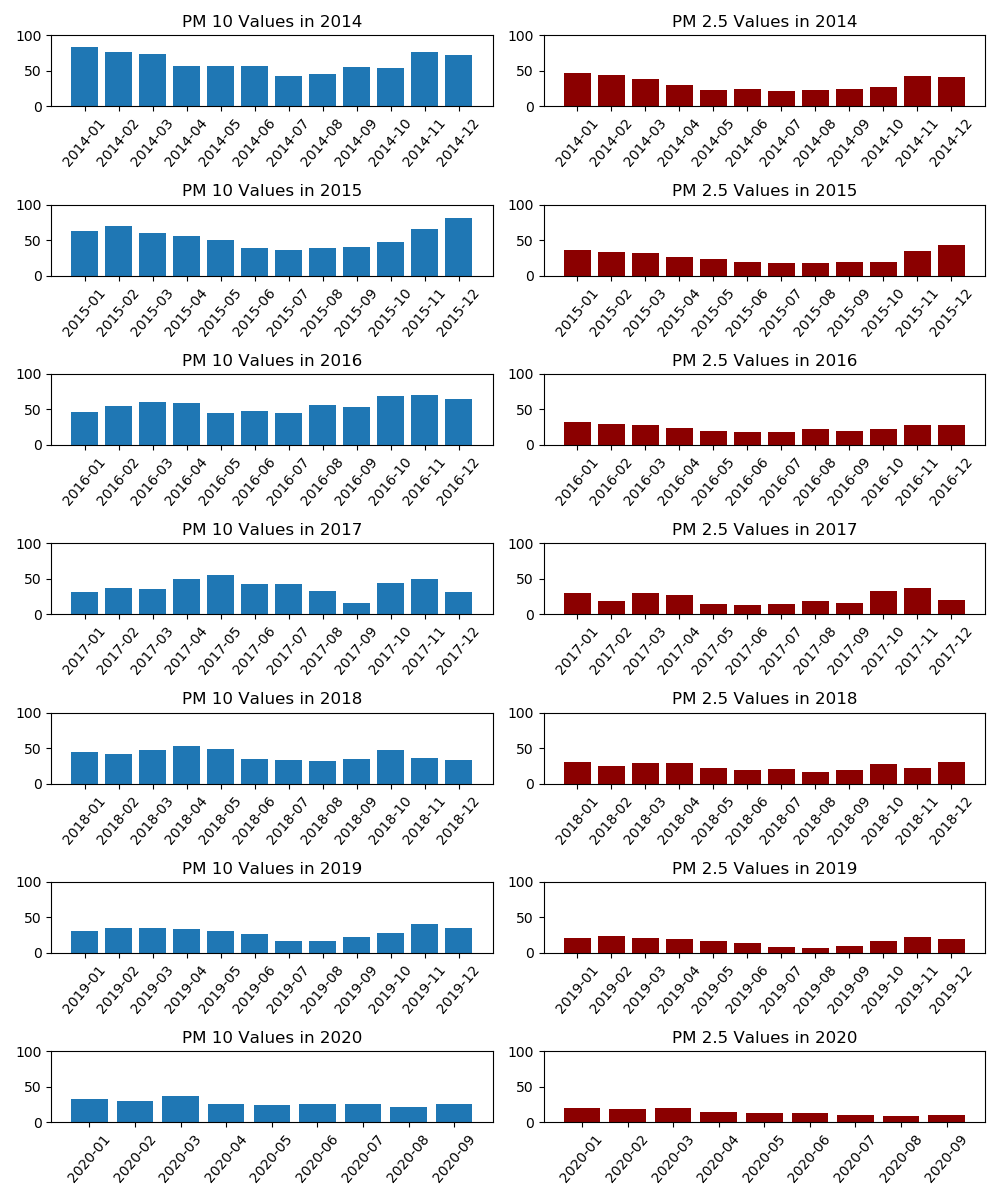

In [52]:
fig, axs = plt.subplots(len(month_grouped_combined_df.mean().Year.unique()), 2, figsize=(10,12))
for k, year in enumerate(range(int(month_grouped_combined_df.mean().Year.min()),
                         int(month_grouped_combined_df.mean().Year.max())+1)):
    year_mask = (month_grouped_combined_df.mean().Year == year)
    axs[k][0].bar(month_grouped_combined_df.mean()[year_mask].index, month_grouped_combined_df.mean()[year_mask]["pm10"])
    axs[k][0].set_title("PM 10 Values in " + str(year))
    axs[k][0].set_ylim([0,100])    
    axs[k][0].tick_params(labelrotation=50, axis="x")    

    axs[k][1].bar(month_grouped_combined_df.mean()[year_mask].index, month_grouped_combined_df.mean()[year_mask]["pm2.5"], 
                  color="darkred")
    axs[k][1].set_title("PM 2.5 Values in " + str(year))   
    axs[k][1].set_ylim([0,100])    
    axs[k][1].tick_params(labelrotation=50, axis="x")    

plt.tight_layout()

<IPython.core.display.Javascript object>


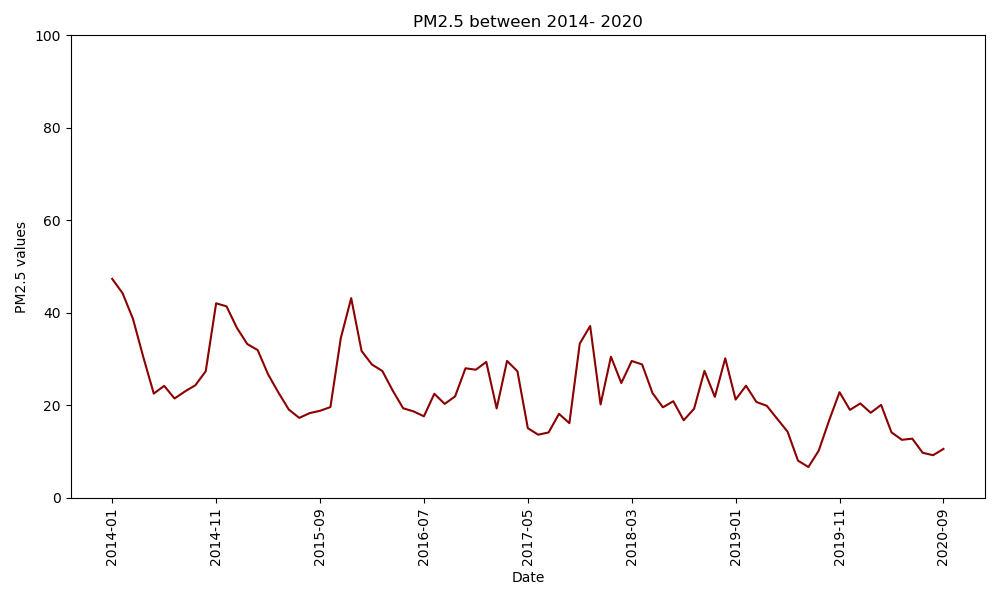

In [53]:
plt.figure(figsize=(10,6))
month_grouped_combined_df.mean()["pm2.5"].plot(color="darkred")
plt.xticks(rotation=90)
plt.ylim([0, 100])
plt.ylabel("PM2.5 values")
plt.title("PM2.5 between 2014- 2020")
plt.tight_layout()

<IPython.core.display.Javascript object>


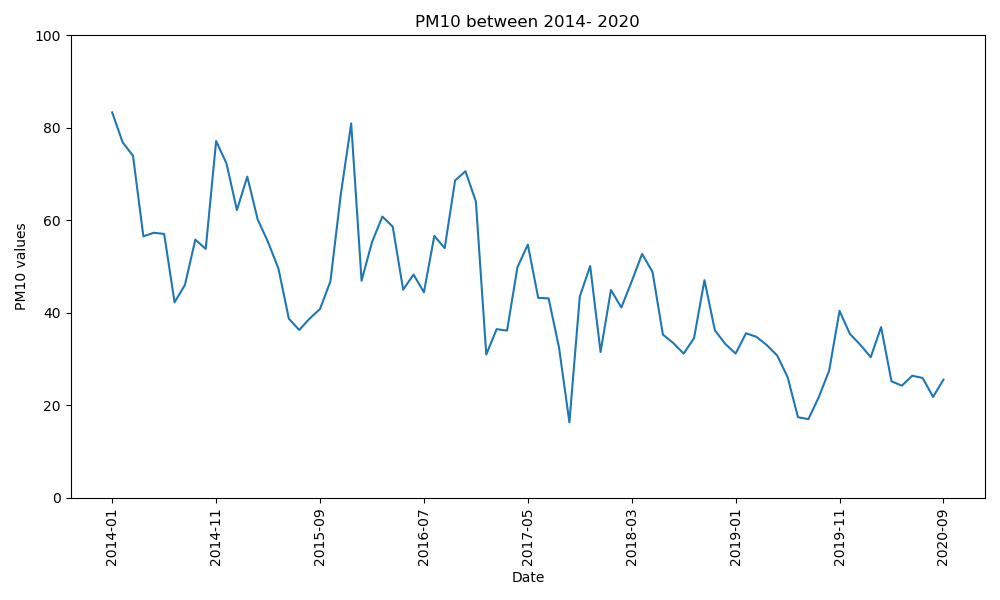

In [54]:
plt.figure(figsize=(10,6))
month_grouped_combined_df.mean().pm10.plot()
plt.xticks(rotation=90)
plt.ylabel("PM10 values")
plt.ylim([0, 100])
plt.title("PM10 between 2014- 2020")
plt.tight_layout()

<IPython.core.display.Javascript object>


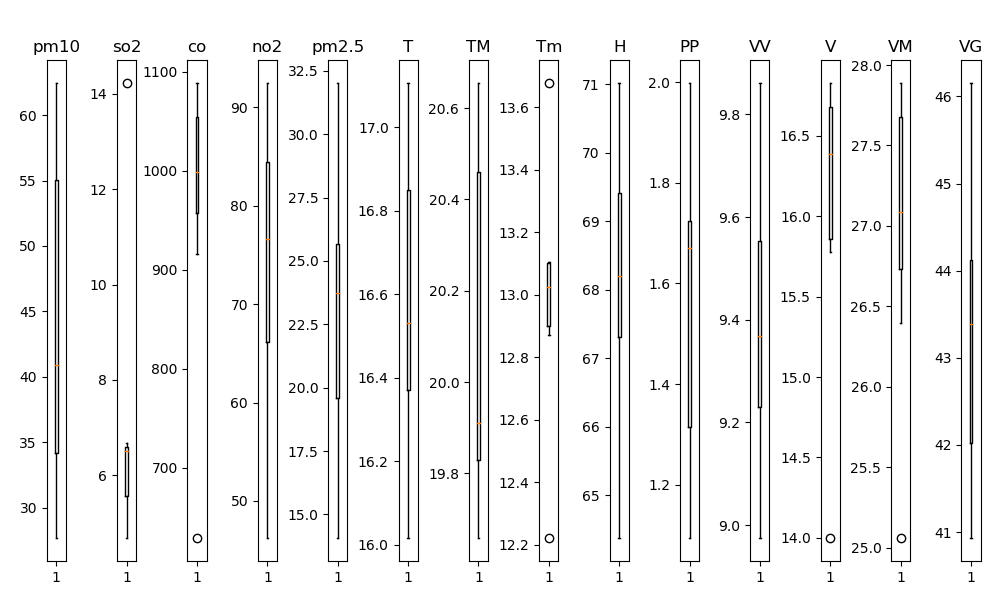

In [55]:
fig, axs = plt.subplots(1, len(year_grouped_combined_df.mean().columns)-1, figsize=(10, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(year_grouped_combined_df.mean().columns)-1),
                     year_grouped_combined_df.mean().columns[:-1]):
    axs[num].boxplot(year_grouped_combined_df.mean()[cols])
    axs[num].set_title(year_grouped_combined_df.mean()[cols].name)

#### Visualization of Dataset filtered by Years

<IPython.core.display.Javascript object>


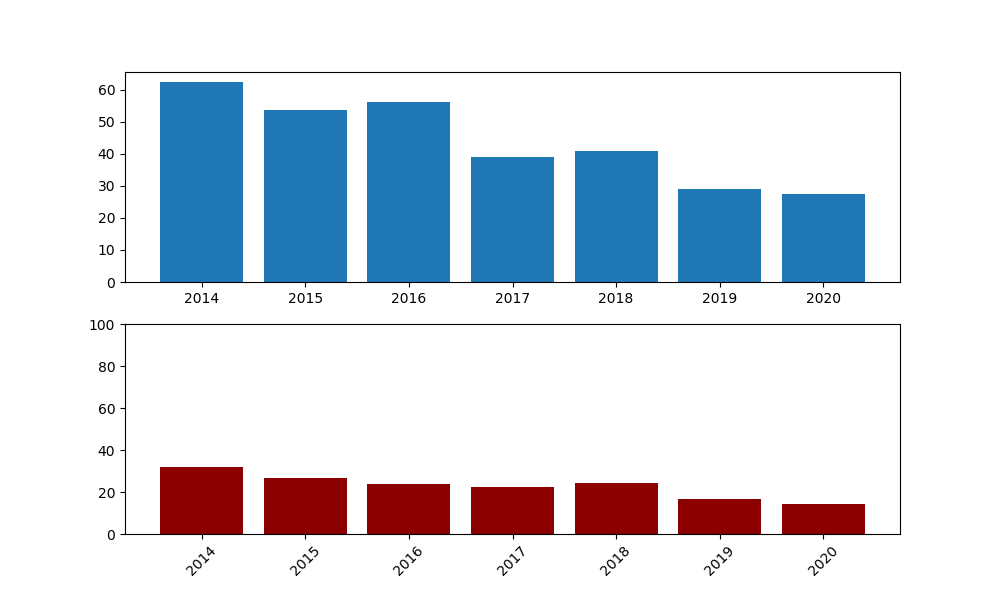

In [56]:
fig, ax = plt.subplots(2,1,figsize=(10,6))
ax[0].bar(year_grouped_combined_df.mean().index, year_grouped_combined_df.mean().pm10)
ax[1].bar(year_grouped_combined_df.mean().index, year_grouped_combined_df.mean()["pm2.5"], color="darkred")
plt.ylim([0, 100])
plt.xticks(rotation=45);

<IPython.core.display.Javascript object>


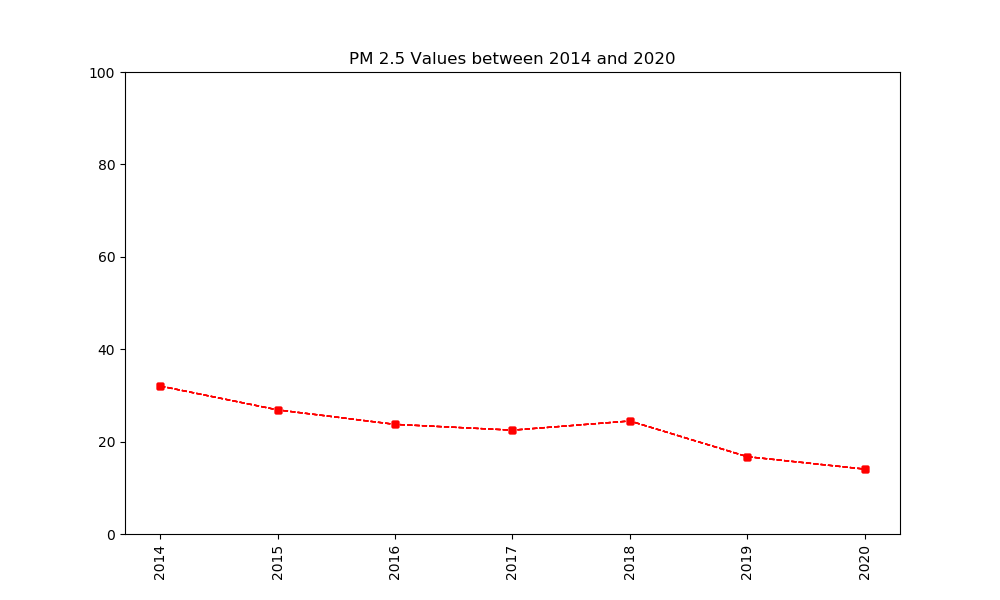

In [57]:
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(year_grouped_combined_df.mean().index.min()),int(year_grouped_combined_df.mean().index.max())+1):
    axs.plot(year_grouped_combined_df.mean()["pm2.5"], marker="s", ls="--", lw=1,
             alpha=0.7, color="r", markersize=4, label="Year")
    axs.set_title("PM 2.5 Values between 2014 and 2020")

plt.xticks(rotation=90)
plt.ylim([0, 100]);

<IPython.core.display.Javascript object>


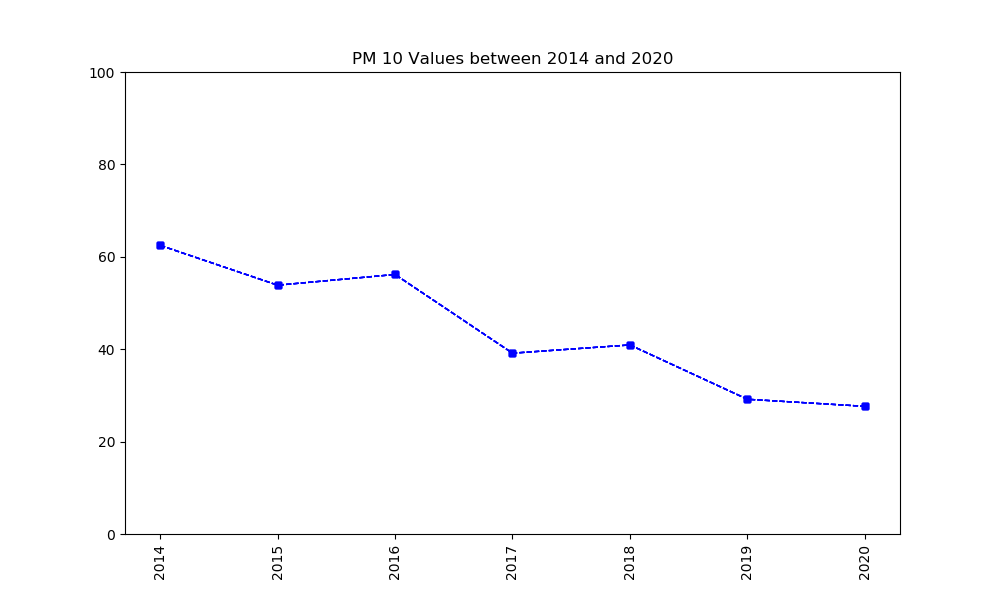

In [58]:
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(year_grouped_combined_df.mean().index.min()),int(year_grouped_combined_df.mean().index.max())+1):
    axs.plot(year_grouped_combined_df.mean().pm10, marker="s", ls="--", lw=1,
             alpha=0.7, color="b", markersize=4, label="Year")
    axs.set_title("PM 10 Values between 2014 and 2020")

plt.xticks(rotation=90)
plt.ylim([0, 100]);

In [62]:
month_grouped_combined_df.first().Year

Date
2014-01    2014
2014-02    2014
2014-03    2014
2014-04    2014
2014-05    2014
           ... 
2020-05    2020
2020-06    2020
2020-07    2020
2020-08    2020
2020-09    2020
Name: Year, Length: 81, dtype: int64

Enter a year between 2014 - 2020
Start Year: 2014
End Year: 2020


<IPython.core.display.Javascript object>


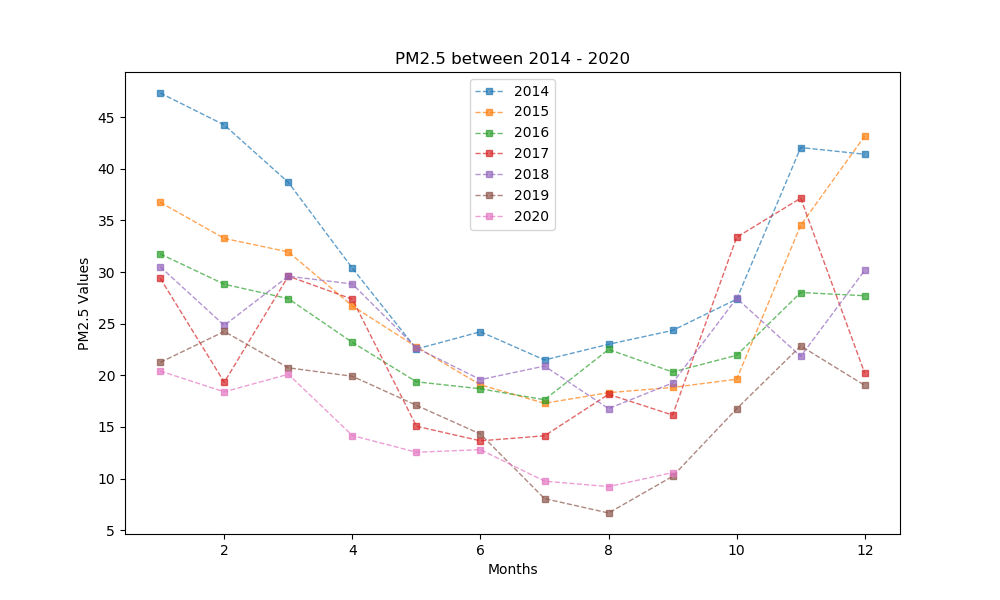

In [63]:
# Checking the all data based on selected years between 2014 - 2020
while True:

    print("Enter a year between 2014 - 2020")
    x = input("Start Year: ")
    y = input("End Year: ")
    
    if x >= "2014" and y <= "2020":
        break
         
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(x), int(y)+1):
    year_mask = (month_grouped_combined_df.first().Year == year)

    axs.plot(month_grouped_combined_df.mean()[year_mask].set_index("Month")["pm2.5"],
             marker="s", ls="--", lw=1, alpha=0.7, markersize=4)
    plt.xlabel("Months")
    plt.ylabel("PM2.5 Values")

    plt.legend([x for x in range(int(x), int(y)+1)])
    
plt.title("PM2.5 between {} - {}".format(x, y));

Enter a year between 2014 - 2020
Start Year: 2014
End Year: 2020


<IPython.core.display.Javascript object>


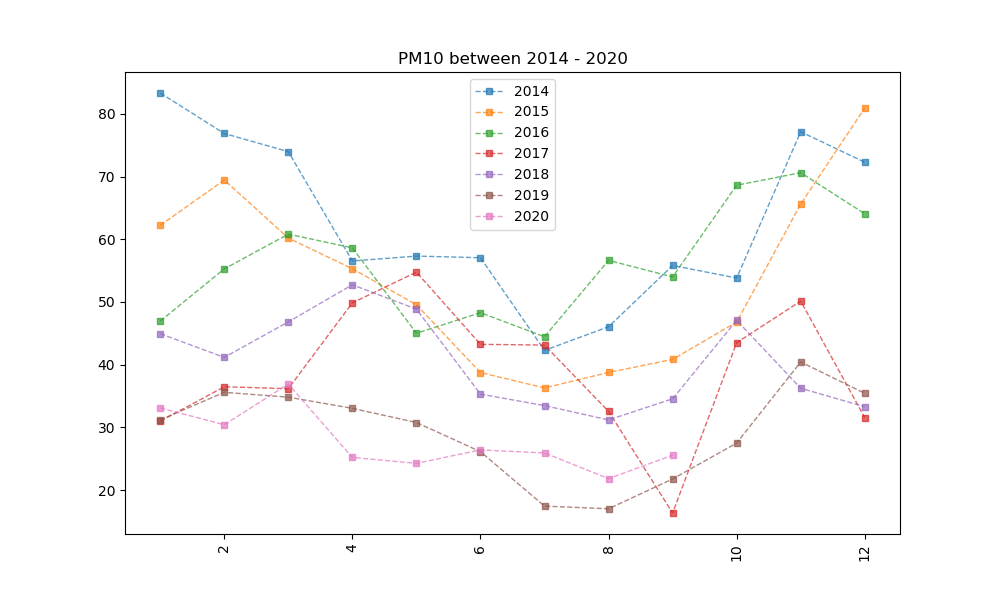

Text(0.5, 1.0, 'PM10 between 2014 - 2020')

In [64]:
# Checking the all data based on selected years between 2014 - 2020
while True:

    print("Enter a year between 2014 - 2020")
    x = input("Start Year: ")
    y = input("End Year: ")
    
    if x >= "2014" and y <= "2020":
        break
        
    
fig, axs = plt.subplots(figsize=(10, 6))

for year in range(int(x), int(y)+1):
    year_mask = (month_grouped_combined_df.first().Year == year)

    axs.plot(month_grouped_combined_df.mean()[year_mask].set_index("Month").pm10,
             marker="s", ls="--", lw=1, alpha=0.7, markersize=4)
    #axs[k].set_title("PM 10 Values in " + str(year))
    plt.xticks(rotation=90)
    plt.legend([x for x in range(int(x), int(y)+1)])
    
plt.title("PM10 between {} - {}".format(x, y))
#plt.tight_layout()

<IPython.core.display.Javascript object>


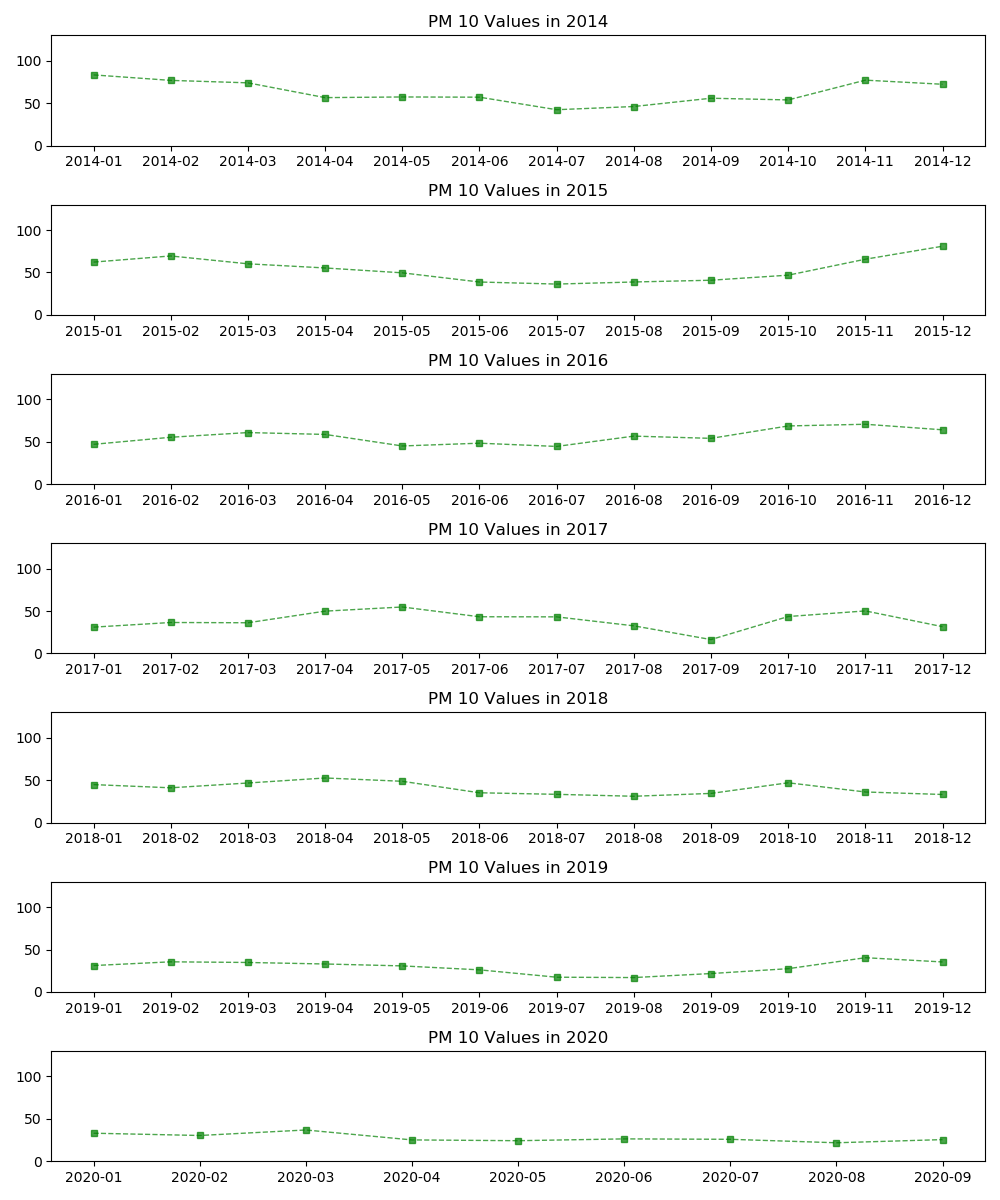

In [66]:
fig, axs = plt.subplots(len(month_grouped_combined_df.first().Year.unique()), 1,figsize=(10, 12))

for num, year in zip(range(len(month_grouped_combined_df.mean().Year.unique())),
                     range(int(month_grouped_combined_df.mean().Year.min()), 
                           int(month_grouped_combined_df.mean().Year.max())+1)):

    year_mask = (month_grouped_combined_df.mean().Year == year)
    #axs[num].set_xticks(rotation=90)
    axs[num].set_ylim(0,130)

    axs[num].plot(month_grouped_combined_df.mean()[year_mask].pm10,
                  marker="s", ls="--", lw=1, alpha=0.7, markersize=4, color="green")
    axs[num].set_title("PM 10 Values in " + str(year))
plt.tight_layout()


#### Visualization of Full Dataset

In [67]:
combined_df.head()

,Date,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
2464,2014-01,83.33,6.66,1026.623333,84.897333,47.336333,7.7,9.0,6.3,84.0,0.00,7.1,11.5,18.3,46.45,1,2014
0,2014-01,109.44,4.26,1122.210000,77.270000,48.320000,8.8,11.0,7.0,73.0,0.00,9.8,8.7,16.5,46.45,1,2014
1,2014-01,115.63,4.65,1497.210000,80.710000,58.070000,9.0,11.0,7.5,83.0,0.51,8.4,10.2,14.8,46.45,1,2014
2,2014-01,88.67,4.26,1351.380000,77.240000,53.590000,8.8,11.0,6.0,86.0,0.00,8.7,9.4,18.3,22.20,1,2014
3,2014-01,105.57,4.83,1618.040000,65.070000,78.250000,8.1,10.0,5.8,90.0,0.00,5.0,1.7,11.1,46.45,1,2014


<IPython.core.display.Javascript object>


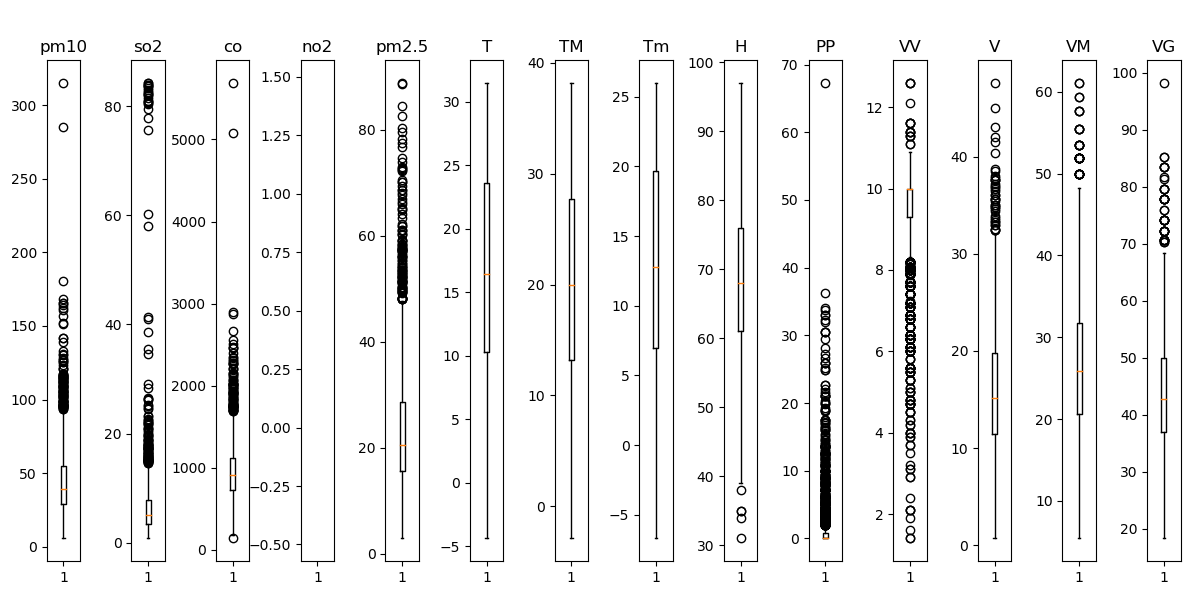

C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\mustafa.erdogan\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


In [68]:
# The visualization of not filtered by Month/Year. 
fig, axs = plt.subplots(1, len(combined_df.columns[1:-2]), figsize=(12, 6))
plt.tight_layout()
plt.subplots_adjust(top=.9)

for num, cols in zip(range(len(combined_df.columns[1:-2])), combined_df.columns[1:-2]):
    
    axs[num].boxplot(combined_df[cols])
    axs[num].set_title(combined_df[cols].name)


In [69]:
combined_df.corr()

,pm10,so2,co,no2,pm2.5,T,TM,Tm,H,PP,VV,V,VM,VG,Month,Year
pm10,1.000000,0.018040,0.487248,0.405088,0.761720,-0.155964,-0.136689,-0.183626,0.070699,-0.125669,-0.350345,-0.267817,-0.202397,-0.061360,-0.005007,-0.493974
so2,0.018040,1.000000,0.205404,-0.130297,0.034808,0.028773,0.034223,0.014449,0.005133,-0.064889,-0.030285,-0.047855,0.008012,-0.014546,-0.000284,0.167853
co,0.487248,0.205404,1.000000,0.249163,0.551928,-0.211860,-0.194809,-0.228549,0.197161,-0.016223,-0.306766,-0.199940,-0.168666,-0.079885,0.017650,-0.193880
no2,0.405088,-0.130297,0.249163,1.000000,0.379239,0.055264,0.082600,0.017902,-0.119113,-0.073191,-0.107516,-0.299318,-0.255025,-0.148153,-0.033870,-0.534289
pm2.5,0.761720,0.034808,0.551928,0.379239,1.000000,-0.380505,-0.361153,-0.404089,0.290622,-0.037853,-0.552583,-0.310544,-0.247688,-0.088252,-0.074190,-0.420094
T,-0.155964,0.028773,-0.211860,0.055264,-0.380505,1.000000,0.987622,0.978921,-0.435644,-0.191128,0.366189,-0.081806,-0.074862,-0.112741,0.358291,0.028540
TM,-0.136689,0.034223,-0.194809,0.082600,-0.361153,0.987622,1.000000,0.948397,-0.472109,-0.206721,0.344716,-0.114481,-0.091984,-0.131717,0.323252,0.036753
Tm,-0.183626,0.014449,-0.228549,0.017902,-0.404089,0.978921,0.948397,1.000000,-0.350853,-0.159263,0.376464,0.003224,-0.011718,-0.057304,0.367404,0.012318
H,0.070699,0.005133,0.197161,-0.119113,0.290622,-0.435644,-0.472109,-0.350853,1.000000,0.297060,-0.402265,0.076489,0.123057,0.079188,-0.060437,0.002887
PP,-0.125669,-0.064889,-0.016223,-0.073191,-0.037853,-0.191128,-0.206721,-0.159263,0.297060,1.000000,-0.095066,0.177477,0.221802,0.244113,-0.025860,-0.020752


<IPython.core.display.Javascript object>


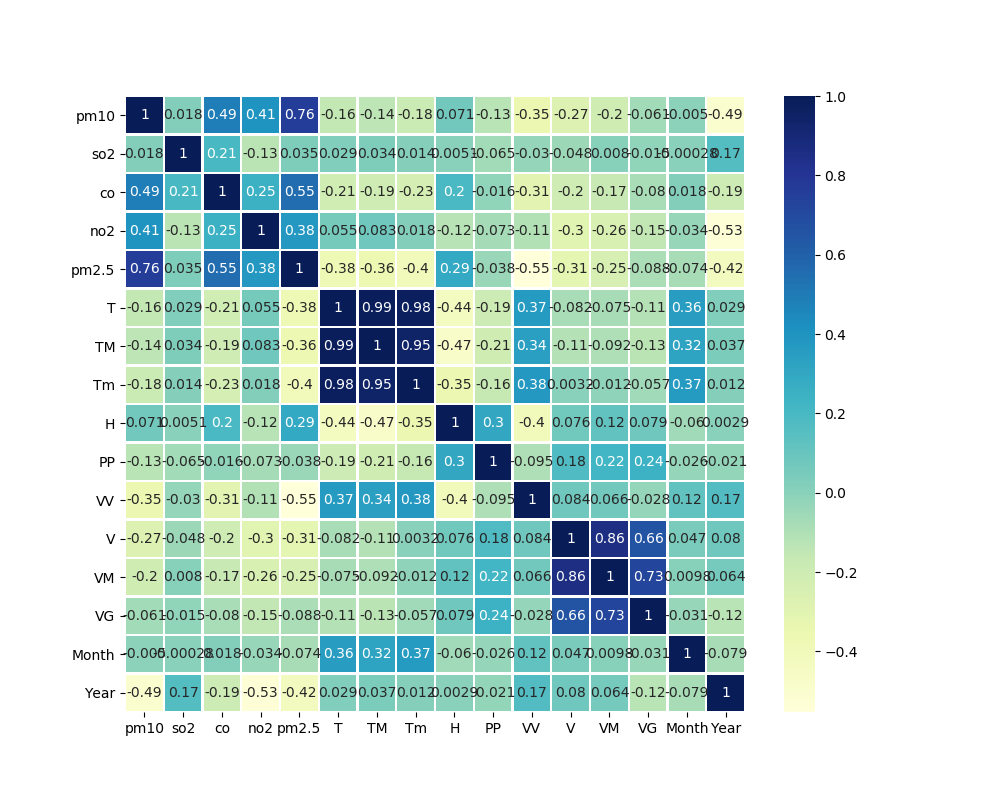

In [70]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(combined_df.corr(), annot=True, lw=1, cmap="YlGnBu")

# Feature Selection

### Before Feature Selection Methods have been applied (using all features)

In [ ]:
X = combined_df.drop("pm10", axis=1)
y = combined_df.pm10

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import classification_report
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=101)
#
#rf_model = RandomForestRegressor().fit(X_train, y_train)
#predictions = rf_model.predict(X_test)


## Feature Selection w/ Univariate Method

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


## Feature Selection w/ Correlation Matrix

In [ ]:
import seaborn as sns


In [ ]:
combined_df.corr()["pm10"].abs().nlargest(5)